In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipynb.fs.defs.tdc_data_analysis import line_hist

In [2]:
def preproces_tdcs(filename=None,debug=False,tdc_df=None):
    ''' 
    Args:
        filename : string
            name of the file
        debug : bool
              if True returns all dataframes
        tdc_df : pd.DataFrame Object
            instead of reading from file one can give the df directly
    Returns:
        time_df : pd.DataFrame Object
            
    It takes the data file for TDC's ONLY, which is assumed to be in the form
    TDCn: t0.
    We first seperate TDC's apart and then merge them, which creates nulls.
    The nulls for TDC2 are back filled i.e. if a cell N is null then it's filled 
    with the last cell <N which isn't null. TDC1 nulls aren't filled but rather dropped
    because we are really interested in TDC2. Finally we calculate the time difference
    between TD1 and TDC2. Finally we gate the difference by 5*10^4 ns = 50 us.
    '''
    if filename is not None:
        tpx_df =pd.read_csv(filename,
                    sep=':',
                    error_bad_lines=False,
                    warn_bad_lines=False,
                    header=None)
    elif tdc_df is not None:
        tpx_df = tdc_df
    else:
        raise(Exception('Either a filename or a tdc data frame needs to be given!'))
    tpx_df.columns = ['tdc','time']

    print('tpx_df nulls\n',tpx_df.isna().sum())
    tdc_one = tpx_df[tpx_df.tdc == 'TDC1']
    tdc_two = tpx_df[tpx_df.tdc == 'TDC2']
    time_df = tdc_one[['time']].join(tdc_two.time,how='outer',lsuffix='1',rsuffix='2')
    time_df['time2'] = time_df['time2'].fillna(method='bfill')
    time_df['time1'] = time_df['time1'].fillna(method='bfill')

    #time_df.dropna(inplace=True)
    time_df = time_df.astype(np.float64)
    time_df['delta_t'] = (time_df.time2-time_df.time1)*1e9
    time_df.reset_index(inplace=True)
    time_df.drop('index',axis=1,inplace=True)
    #time_df = time_df[np.abs(time_df.delta_t)< 5e3]
    if debug:
        return tpx_df, tdc_one, tdc_two, time_df
    else:
        print(time_df.head(10))
        return time_df

In [232]:
_,tdc_one_bg, tdc_two_bg,_= preproces_tdcs('tdc8.txt',debug=True)

tpx_df nulls
 tdc     0
time    0
dtype: int64


In [4]:
len(tdc_one_bg)

638120

In [5]:
len(tdc_two_bg)

747017

In [6]:
len(tdc_one_bg)

638120

In [104]:
def final_processing(df_str,debug=False):
    if debug:
        tpx_data = df_str
    else:
        tpx_data = pd.read_csv(StringIO(df_str),index_col=False)
    tpx_data['totx'] = tpx_data['tot']*tpx_data['x']
    tpx_data['toty'] = tpx_data['tot']*tpx_data['y']
    tpx_data['toa1'] = (tpx_data['toa']-tpx_data['tdc1'])
    tpx_data['toa2'] = (tpx_data['tdc2']-tpx_data['toa'])
    tpx_data['delta_t'] = (tpx_data['tdc2']-tpx_data['tdc1'])
    tpx_data['ones'] =1
    batches = tpx_data.groupby('batch').sum()
    batches['toa1'] = batches['toa1']/batches['ones']
    batches['toa2'] = batches['toa2']/batches['ones']
    batches['delta_t'] = batches['delta_t']/batches['ones']
    batches['x'] = batches['totx']/batches['tot']
    batches['y'] = batches['toty']/batches['tot']
    batches.drop(['toa','tot','tdc1','tdc2','totx','toty','ones'],axis=1,inplace=True)
    if debug:
        return batches
    return batches.to_csv(header=False)

In [8]:
from io import StringIO

In [9]:
np.float64(25*2**30/1e9)

26.8435456

In [10]:
print(f"Line is {line_counter:,}")

NameError: name 'line_counter' is not defined

1_000_000 lines read
100_000 lines were rejected due to tdc2 mismatch
2_000_000 lines read
200_000 lines were rejected due to tdc2 mismatch

Batch numer 20_000 is written
2_331_179 lines read
-----
5_000 batches were rejected due to many electrons


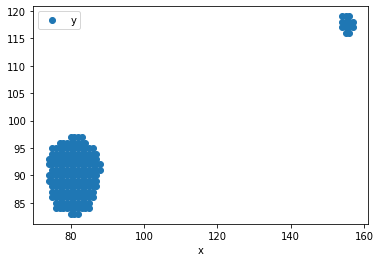

3_000_000 lines read
100_000 lines were rejected due to tdc1 mismatch
### TOA Overflow NO 1
toa_prev 26.8432881046875 toa 26.844766946874998 tdc1 26.8432837567688 tdc2 26.8432885492187
300_000 lines were rejected due to tdc2 mismatch


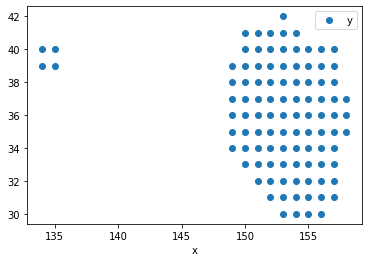

4_000_000 lines read
10_000 batches were rejected due to many electrons
400_000 lines were rejected due to tdc2 mismatch

Batch numer 40_000 is written
4_666_546 lines read
-----
5_000_000 lines read


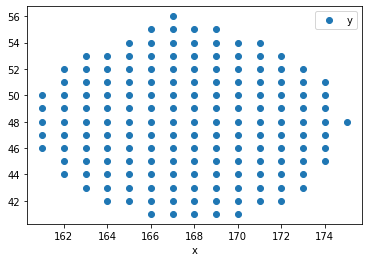

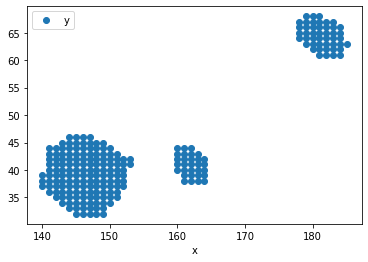

500_000 lines were rejected due to tdc2 mismatch
200_000 lines were rejected due to tdc1 mismatch


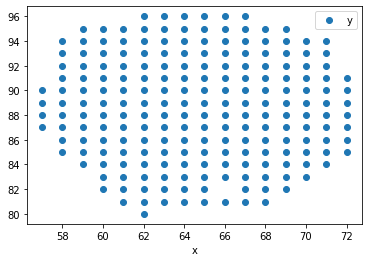

6_000_000 lines read


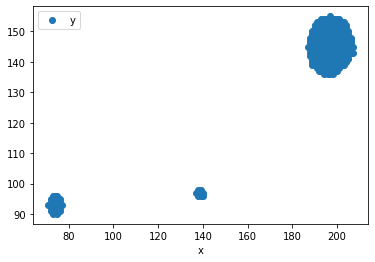

### TOA Overflow NO 2
toa_prev 53.6860586046875 toa 53.6870919171875 tdc1 53.686054253125 tdc2 53.686059040625
15_000 batches were rejected due to many electrons
600_000 lines were rejected due to tdc2 mismatch
7_000_000 lines read

Batch numer 60_000 is written
7_003_923 lines read
-----
8_000_000 lines read
700_000 lines were rejected due to tdc2 mismatch
300_000 lines were rejected due to tdc1 mismatch


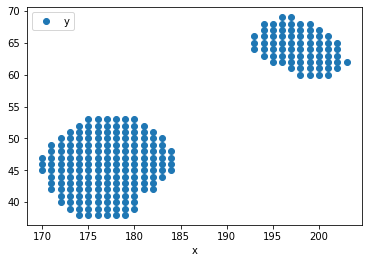

9_000_000 lines read
20_000 batches were rejected due to many electrons
800_000 lines were rejected due to tdc2 mismatch

Batch numer 80_000 is written
9_369_977 lines read
-----
10_000_000 lines read
### TOA Overflow NO 3
toa_prev 80.529615959375 toa 80.53076879062499 tdc1 80.5296271729126 tdc2 80.5294288893188
900_000 lines were rejected due to tdc2 mismatch


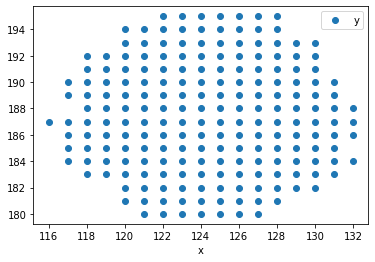

11_000_000 lines read
25_000 batches were rejected due to many electrons
1_000_000 lines were rejected due to tdc2 mismatch

Batch numer 100_000 is written
11_723_762 lines read
-----
400_000 lines were rejected due to tdc1 mismatch
12_000_000 lines read
1_100_000 lines were rejected due to tdc2 mismatch
13_000_000 lines read
30_000 batches were rejected due to many electrons
### TDC2 Overflow NO 1
tdc2 107.372405525519 tdc2_next 107.37467885468749 tdc1 107.371344810156 toa 107.3723913265625
### TOA Overflow NO 4
toa_prev 107.3732297453125 toa 107.3746785125 tdc1 107.373225389319 tdc2 107.372405525519
### TDC1 Overflow NO 1
tdc1 107.374165678644 tdc1_next 107.3751059682251 tdc2 107.37467885468749 toa 107.3746785125
1_200_000 lines were rejected due to tdc2 mismatch
14_000_000 lines read

Batch numer 120_000 is written
14_103_460 lines read
-----
500_000 lines were rejected due to tdc1 mismatch


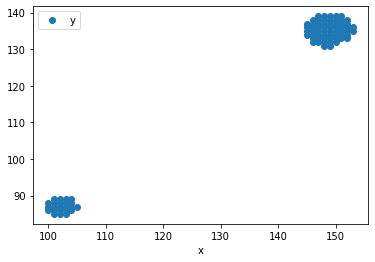

15_000_000 lines read
1_300_000 lines were rejected due to tdc2 mismatch


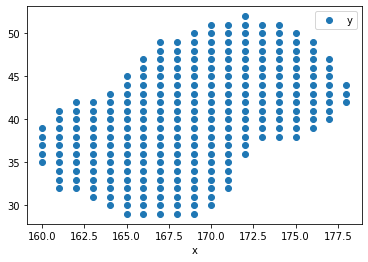

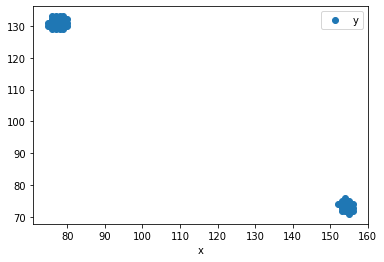

35_000 batches were rejected due to many electrons
16_000_000 lines read
1_400_000 lines were rejected due to tdc2 mismatch

Batch numer 140_000 is written
16_457_260 lines read
-----
17_000_000 lines read
### TOA Overflow NO 5
toa_prev 134.2176698828125 toa 134.2184914734375 tdc1 134.21770172291258 tdc2 134.21767029765618
1_500_000 lines were rejected due to tdc2 mismatch
600_000 lines were rejected due to tdc1 mismatch
18_000_000 lines read
40_000 batches were rejected due to many electrons
1_600_000 lines were rejected due to tdc2 mismatch

Batch numer 160_000 is written
18_785_716 lines read
-----
19_000_000 lines read
1_700_000 lines were rejected due to tdc2 mismatch
20_000_000 lines read
45_000 batches were rejected due to many electrons
700_000 lines were rejected due to tdc1 mismatch
### TOA Overflow NO 6
toa_prev 161.06071669375 toa 161.0613956 tdc1 161.0603990572876 tdc2 161.0605327471313
1_800_000 lines were rejected due to tdc2 mismatch


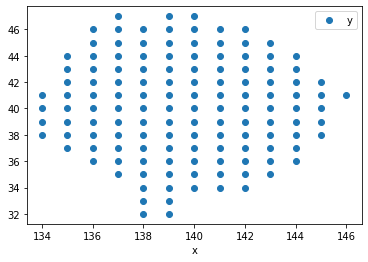

21_000_000 lines read

Batch numer 180_000 is written
21_164_141 lines read
-----
1_900_000 lines were rejected due to tdc2 mismatch
22_000_000 lines read


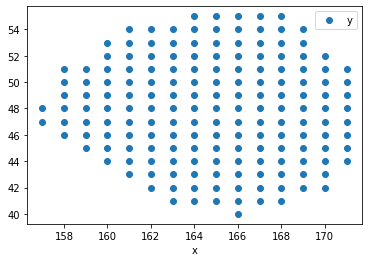

50_000 batches were rejected due to many electrons
2_000_000 lines were rejected due to tdc2 mismatch
23_000_000 lines read


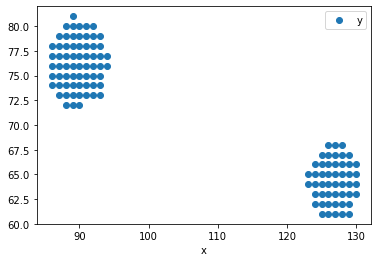

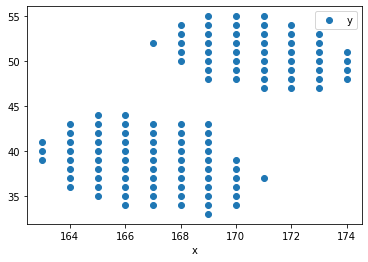


Batch numer 200_000 is written
23_506_796 lines read
-----
800_000 lines were rejected due to tdc1 mismatch
24_000_000 lines read
2_100_000 lines were rejected due to tdc2 mismatch
### TOA Overflow NO 7
toa_prev 187.904638953125 toa 187.9055133859375 tdc1 187.90399858255 tdc2 187.904639398175
55_000 batches were rejected due to many electrons
25_000_000 lines read
2_200_000 lines were rejected due to tdc2 mismatch

Batch numer 220_000 is written
25_842_005 lines read
-----
26_000_000 lines read
900_000 lines were rejected due to tdc1 mismatch
2_300_000 lines were rejected due to tdc2 mismatch


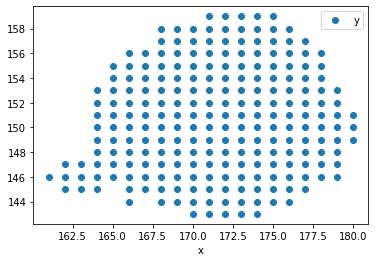

27_000_000 lines read
60_000 batches were rejected due to many electrons


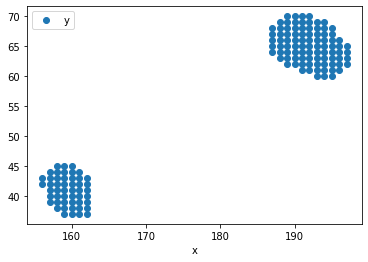

2_400_000 lines were rejected due to tdc2 mismatch
### TDC2 Overflow NO 2
tdc2 214.747223045569 tdc2_next 214.74848888203124 tdc1 214.7447230526 toa 214.7472226578125
### TDC1 Overflow NO 2
tdc1 214.747543826819 tdc1_next 214.7484840927063 tdc2 214.747223045569 toa 214.7475482734375
### TOA Overflow NO 8
toa_prev 214.7482237921875 toa 214.7484885015625 tdc1 214.747543826819 tdc2 214.74848888203124
28_000_000 lines read

Batch numer 240_000 is written
28_197_768 lines read
-----
2_500_000 lines were rejected due to tdc2 mismatch
29_000_000 lines read
1_000_000 lines were rejected due to tdc1 mismatch


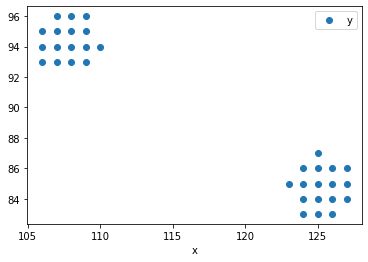

65_000 batches were rejected due to many electrons
2_600_000 lines were rejected due to tdc2 mismatch
30_000_000 lines read

Batch numer 260_000 is written
30_559_195 lines read
-----
31_000_000 lines read
2_700_000 lines were rejected due to tdc2 mismatch
### TOA Overflow NO 9
toa_prev 241.5910723390625 toa 241.591946778125 tdc1 241.59106799583128 tdc2 241.59107278593748
70_000 batches were rejected due to many electrons
32_000_000 lines read
1_100_000 lines were rejected due to tdc1 mismatch
2_800_000 lines were rejected due to tdc2 mismatch

Batch numer 280_000 is written
32_910_710 lines read
-----
33_000_000 lines read
2_900_000 lines were rejected due to tdc2 mismatch


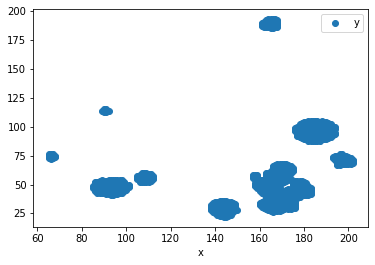

75_000 batches were rejected due to many electrons
34_000_000 lines read
### TOA Overflow NO 10
toa_prev 268.4353778078125 toa 268.435687159375 tdc1 268.4347057057251 tdc2 268.4353782455688
3_000_000 lines were rejected due to tdc2 mismatch
35_000_000 lines read
1_200_000 lines were rejected due to tdc1 mismatch

Batch numer 300_000 is written
35_267_857 lines read
-----
3_100_000 lines were rejected due to tdc2 mismatch
36_000_000 lines read
80_000 batches were rejected due to many electrons
3_200_000 lines were rejected due to tdc2 mismatch
37_000_000 lines read

Batch numer 320_000 is written
37_607_258 lines read
-----
1_300_000 lines were rejected due to tdc1 mismatch
3_300_000 lines were rejected due to tdc2 mismatch
### TOA Overflow NO 11
toa_prev 295.2789614265625 toa 295.280051978125 tdc1 295.2783169807251 tdc2 295.27896187109377
38_000_000 lines read
85_000 batches were rejected due to many electrons
39_000_000 lines read
3_400_000 lines were rejected due to tdc2 mismatch

Ba

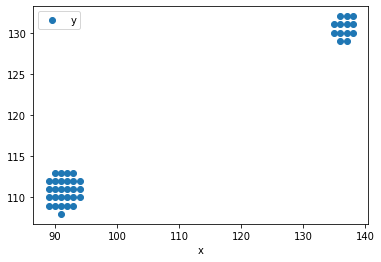

1_400_000 lines were rejected due to tdc1 mismatch
90_000 batches were rejected due to many electrons
41_000_000 lines read
3_600_000 lines were rejected due to tdc2 mismatch
### TDC2 Overflow NO 3
tdc2 322.121583936456 tdc2_next 322.1227852703125 tdc1 322.120899995312 toa 322.121583540625
### TDC1 Overflow NO 3
tdc1 322.1218402375 tdc1_next 322.1227804799438 tdc2 322.1227852703125 toa 322.1223701265625
### TOA Overflow NO 12
toa_prev 322.12237011718753 toa 322.122784890625 tdc1 322.1218402375 tdc2 322.1227852703125
42_000_000 lines read


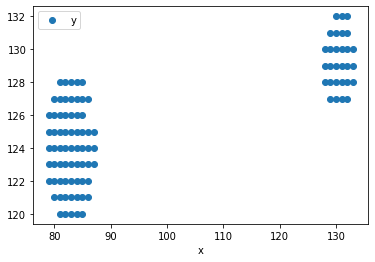

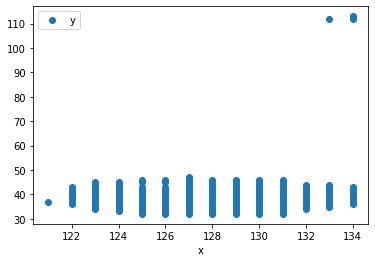


Batch numer 360_000 is written
42_297_760 lines read
-----
3_700_000 lines were rejected due to tdc2 mismatch
43_000_000 lines read
95_000 batches were rejected due to many electrons


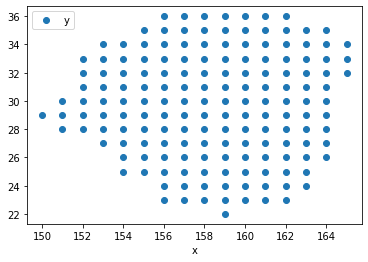

1_500_000 lines were rejected due to tdc1 mismatch
3_800_000 lines were rejected due to tdc2 mismatch
44_000_000 lines read

Batch numer 380_000 is written
44_650_449 lines read
-----
### TOA Overflow NO 13
toa_prev 348.96519926562496 toa 348.96624572656253 tdc1 348.9643607447876 tdc2 348.96519971328127
3_900_000 lines were rejected due to tdc2 mismatch
45_000_000 lines read
100_000 batches were rejected due to many electrons
46_000_000 lines read
4_000_000 lines were rejected due to tdc2 mismatch
1_600_000 lines were rejected due to tdc1 mismatch


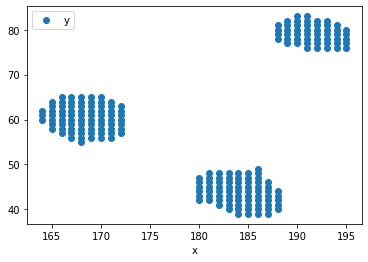

47_000_000 lines read

Batch numer 400_000 is written
47_017_867 lines read
-----


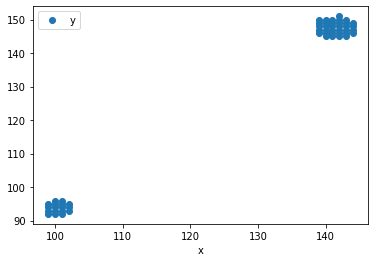

4_100_000 lines were rejected due to tdc2 mismatch
105_000 batches were rejected due to many electrons
48_000_000 lines read
### TOA Overflow NO 14
toa_prev 375.8088105359375 toa 375.810338178125 tdc1 375.8085959494751 tdc2 375.8080836080688
4_200_000 lines were rejected due to tdc2 mismatch
49_000_000 lines read

Batch numer 420_000 is written
49_369_497 lines read
-----
1_700_000 lines were rejected due to tdc1 mismatch
4_300_000 lines were rejected due to tdc2 mismatch
110_000 batches were rejected due to many electrons
50_000_000 lines read
4_400_000 lines were rejected due to tdc2 mismatch


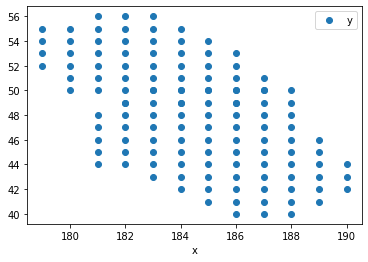

51_000_000 lines read

Batch numer 440_000 is written
51_714_339 lines read
-----
### TOA Overflow NO 15
toa_prev 402.652864628125 toa 402.65325868749994 tdc1 402.6523139710937 tdc2 402.6532590390625
4_500_000 lines were rejected due to tdc2 mismatch
52_000_000 lines read
115_000 batches were rejected due to many electrons
1_800_000 lines were rejected due to tdc1 mismatch
53_000_000 lines read
4_600_000 lines were rejected due to tdc2 mismatch
54_000_000 lines read

Batch numer 460_000 is written
54_055_237 lines read
-----
4_700_000 lines were rejected due to tdc2 mismatch
120_000 batches were rejected due to many electrons
55_000_000 lines read
### TDC2 Overflow NO 4
tdc2 429.49596691249997 tdc2_next 429.4968547380188 tdc1 429.494085420312 toa 429.4956351296875
### TDC1 Overflow NO 4
tdc1 429.495966022656 tdc1_next 429.49690632369385 tdc2 429.49596691249997 toa 429.49596652500003
### TOA Overflow NO 16
toa_prev 429.49596647343753 toa 429.49685438593747 tdc1 429.495966022656 tdc2 429

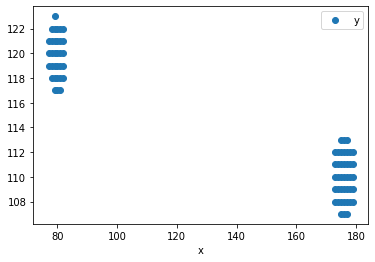


Batch numer 480_000 is written
56_406_006 lines read
-----
4_900_000 lines were rejected due to tdc2 mismatch
125_000 batches were rejected due to many electrons
57_000_000 lines read
5_000_000 lines were rejected due to tdc2 mismatch
58_000_000 lines read
2_000_000 lines were rejected due to tdc1 mismatch


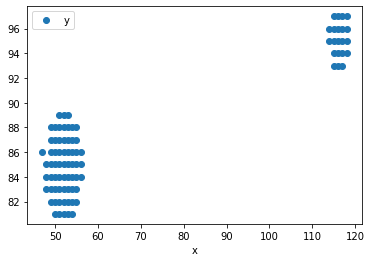

### TOA Overflow NO 17
toa_prev 456.3396248390625 toa 456.3404712421875 tdc1 456.33962049843745 tdc2 456.3396252880188

Batch numer 500_000 is written
58_740_470 lines read
-----
130_000 batches were rejected due to many electrons
5_100_000 lines were rejected due to tdc2 mismatch
59_000_000 lines read


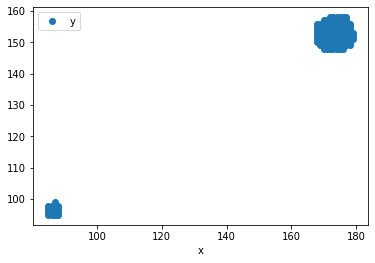

60_000_000 lines read
5_200_000 lines were rejected due to tdc2 mismatch
2_100_000 lines were rejected due to tdc1 mismatch
61_000_000 lines read

Batch numer 520_000 is written
61_116_796 lines read
-----
135_000 batches were rejected due to many electrons


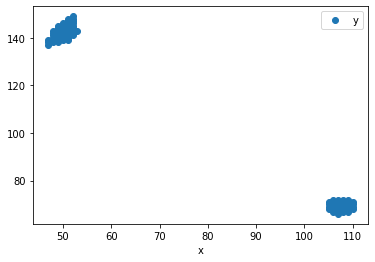

5_300_000 lines were rejected due to tdc2 mismatch
62_000_000 lines read
### TOA Overflow NO 18
toa_prev 483.18351573124994 toa 483.18575050156244 tdc1 483.18331601770626 tdc2 483.18284801041256
5_400_000 lines were rejected due to tdc2 mismatch
63_000_000 lines read
140_000 batches were rejected due to many electrons

Batch numer 540_000 is written
63_491_228 lines read
-----
5_500_000 lines were rejected due to tdc2 mismatch
2_200_000 lines were rejected due to tdc1 mismatch


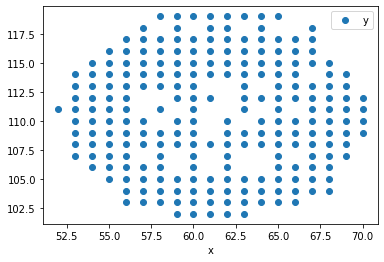

64_000_000 lines read
5_600_000 lines were rejected due to tdc2 mismatch
65_000_000 lines read


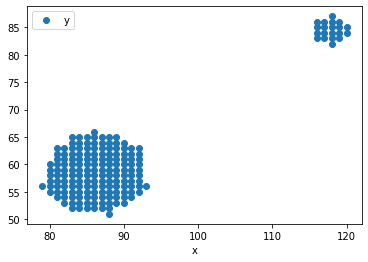

### TOA Overflow NO 19
toa_prev 510.0272774671875 toa 510.0279860828125 tdc1 510.02704129791255 tdc2 510.02727791614376
145_000 batches were rejected due to many electrons

Batch numer 560_000 is written
65_806_999 lines read
-----
5_700_000 lines were rejected due to tdc2 mismatch
66_000_000 lines read
2_300_000 lines were rejected due to tdc1 mismatch
67_000_000 lines read
5_800_000 lines were rejected due to tdc2 mismatch
68_000_000 lines read
150_000 batches were rejected due to many electrons

Batch numer 580_000 is written
68_129_807 lines read
-----
5_900_000 lines were rejected due to tdc2 mismatch
### TDC2 Overflow NO 5
tdc2 536.870564239062 tdc2_next 536.87133654375 tdc1 536.868694326819 toa 536.8705638390625
### TDC1 Overflow NO 5
tdc1 536.8705747762999 tdc1_next 536.8715149361938 tdc2 536.870564239062 toa 536.8705638390625
### TOA Overflow NO 20
toa_prev 536.8705791234376 toa 536.871336159375 tdc1 536.8705747762999 tdc2 536.870564239062
69_000_000 lines read
6_000_000 lines

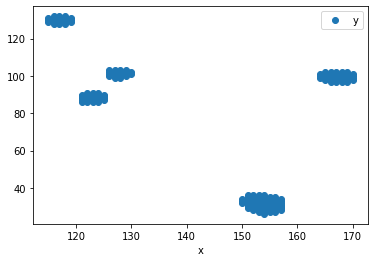

6_200_000 lines were rejected due to tdc2 mismatch
72_000_000 lines read
### TOA Overflow NO 21
toa_prev 563.7142355609375 toa 563.7145517328124 tdc1 563.7142405585938 tdc2 563.7139838151
### TOA Overflow NO 22
toa_prev 590.5576876593749 toa 590.5580972390624 tdc1 590.5569663591125 tdc2 590.5578788234375
6_300_000 lines were rejected due to tdc2 mismatch
160_000 batches were rejected due to many electrons
6_400_000 lines were rejected due to tdc2 mismatch
6_500_000 lines were rejected due to tdc2 mismatch
6_600_000 lines were rejected due to tdc2 mismatch
2_500_000 lines were rejected due to tdc1 mismatch
6_700_000 lines were rejected due to tdc2 mismatch
6_800_000 lines were rejected due to tdc2 mismatch
73_000_000 lines read
6_900_000 lines were rejected due to tdc2 mismatch
165_000 batches were rejected due to many electrons
7_000_000 lines were rejected due to tdc2 mismatch
7_100_000 lines were rejected due to tdc2 mismatch
7_200_000 lines were rejected due to tdc2 mismatch
7_300_0

17_600_000 lines were rejected due to tdc2 mismatch
17_700_000 lines were rejected due to tdc2 mismatch
17_800_000 lines were rejected due to tdc2 mismatch
17_900_000 lines were rejected due to tdc2 mismatch
85_000_000 lines read
18_000_000 lines were rejected due to tdc2 mismatch
250_000 batches were rejected due to many electrons
18_100_000 lines were rejected due to tdc2 mismatch
18_200_000 lines were rejected due to tdc2 mismatch
18_300_000 lines were rejected due to tdc2 mismatch
18_400_000 lines were rejected due to tdc2 mismatch
18_500_000 lines were rejected due to tdc2 mismatch
18_600_000 lines were rejected due to tdc2 mismatch
255_000 batches were rejected due to many electrons
18_700_000 lines were rejected due to tdc2 mismatch
18_800_000 lines were rejected due to tdc2 mismatch
86_000_000 lines read
18_900_000 lines were rejected due to tdc2 mismatch
### TOA Overflow NO 26
toa_prev 697.9313092765624 toa 697.9321954390624 tdc1 697.9307299041626 tdc2 697.9315421020813
3_100_

28_900_000 lines were rejected due to tdc2 mismatch
29_000_000 lines were rejected due to tdc2 mismatch
29_100_000 lines were rejected due to tdc2 mismatch
29_200_000 lines were rejected due to tdc2 mismatch
340_000 batches were rejected due to many electrons
29_300_000 lines were rejected due to tdc2 mismatch
29_400_000 lines were rejected due to tdc2 mismatch
29_500_000 lines were rejected due to tdc2 mismatch
29_600_000 lines were rejected due to tdc2 mismatch
98_000_000 lines read
29_700_000 lines were rejected due to tdc2 mismatch
29_800_000 lines were rejected due to tdc2 mismatch
29_900_000 lines were rejected due to tdc2 mismatch
345_000 batches were rejected due to many electrons
4_000_000 lines were rejected due to tdc1 mismatch
30_000_000 lines were rejected due to tdc2 mismatch
30_100_000 lines were rejected due to tdc2 mismatch
30_200_000 lines were rejected due to tdc2 mismatch
30_300_000 lines were rejected due to tdc2 mismatch
30_400_000 lines were rejected due to tdc2 

40_400_000 lines were rejected due to tdc2 mismatch
40_500_000 lines were rejected due to tdc2 mismatch
110_000_000 lines read
40_600_000 lines were rejected due to tdc2 mismatch
430_000 batches were rejected due to many electrons
40_700_000 lines were rejected due to tdc2 mismatch
4_800_000 lines were rejected due to tdc1 mismatch
### TOA Overflow NO 33
toa_prev 885.8369513140625 toa 885.837830090625 tdc1 885.8368984924438 tdc2 885.83690328125
40_800_000 lines were rejected due to tdc2 mismatch
40_900_000 lines were rejected due to tdc2 mismatch
41_000_000 lines were rejected due to tdc2 mismatch
41_100_000 lines were rejected due to tdc2 mismatch
41_200_000 lines were rejected due to tdc2 mismatch
41_300_000 lines were rejected due to tdc2 mismatch
435_000 batches were rejected due to many electrons
41_400_000 lines were rejected due to tdc2 mismatch
111_000_000 lines read
41_500_000 lines were rejected due to tdc2 mismatch
41_600_000 lines were rejected due to tdc2 mismatch
41_700_0

51_700_000 lines were rejected due to tdc2 mismatch
51_800_000 lines were rejected due to tdc2 mismatch
51_900_000 lines were rejected due to tdc2 mismatch
5_600_000 lines were rejected due to tdc1 mismatch
52_000_000 lines were rejected due to tdc2 mismatch
52_100_000 lines were rejected due to tdc2 mismatch
520_000 batches were rejected due to many electrons
52_200_000 lines were rejected due to tdc2 mismatch
52_300_000 lines were rejected due to tdc2 mismatch
123_000_000 lines read
52_400_000 lines were rejected due to tdc2 mismatch
52_500_000 lines were rejected due to tdc2 mismatch
52_600_000 lines were rejected due to tdc2 mismatch
52_700_000 lines were rejected due to tdc2 mismatch
525_000 batches were rejected due to many electrons
52_800_000 lines were rejected due to tdc2 mismatch
5_700_000 lines were rejected due to tdc1 mismatch
52_900_000 lines were rejected due to tdc2 mismatch
53_000_000 lines were rejected due to tdc2 mismatch
53_100_000 lines were rejected due to tdc2 

63_200_000 lines were rejected due to tdc2 mismatch
135_000_000 lines read
63_300_000 lines were rejected due to tdc2 mismatch
63_400_000 lines were rejected due to tdc2 mismatch
63_500_000 lines were rejected due to tdc2 mismatch
63_600_000 lines were rejected due to tdc2 mismatch
610_000 batches were rejected due to many electrons
63_700_000 lines were rejected due to tdc2 mismatch
63_800_000 lines were rejected due to tdc2 mismatch
63_900_000 lines were rejected due to tdc2 mismatch
64_000_000 lines were rejected due to tdc2 mismatch
64_100_000 lines were rejected due to tdc2 mismatch
136_000_000 lines read
64_200_000 lines were rejected due to tdc2 mismatch
615_000 batches were rejected due to many electrons
64_300_000 lines were rejected due to tdc2 mismatch
64_400_000 lines were rejected due to tdc2 mismatch
64_500_000 lines were rejected due to tdc2 mismatch
64_600_000 lines were rejected due to tdc2 mismatch
64_700_000 lines were rejected due to tdc2 mismatch
64_800_000 lines w

700_000 batches were rejected due to many electrons
75_100_000 lines were rejected due to tdc2 mismatch
75_200_000 lines were rejected due to tdc2 mismatch
75_300_000 lines were rejected due to tdc2 mismatch
75_400_000 lines were rejected due to tdc2 mismatch
75_500_000 lines were rejected due to tdc2 mismatch
75_600_000 lines were rejected due to tdc2 mismatch
75_700_000 lines were rejected due to tdc2 mismatch
705_000 batches were rejected due to many electrons
75_800_000 lines were rejected due to tdc2 mismatch
7_300_000 lines were rejected due to tdc1 mismatch
### TDC2 Overflow NO 11
tdc2 1181.1159824387998 tdc2_next 1181.1178133299436 tdc1 1181.115037360413 toa 1181.115672984375
### TOA Overflow NO 44
toa_prev 1181.1156729046875 toa 1181.1162829265622 tdc1 1181.115037360413 tdc2 1181.1159824387998
### TDC1 Overflow NO 11
tdc1 1181.115977650256 tdc1_next 1181.1169179747376 tdc2 1181.1159824387998 toa 1181.1162829265622
75_900_000 lines were rejected due to tdc2 mismatch
149_000_000

StopIteration: 

In [233]:
NTOTBATCHES = -1
NBATCH = 20_000
BEGINLINE= 0
line_counter = 0
NLINES = -1
batch = 0

tdc_updated = False

t1_eps = 9e-4 #tdc1 tolerance
t2_eps = 3e-6 #tdc2 tolerance

x_threshold = 15
y_threshold = 15
xmax = 0
xmin = 1000 # detector has only 256x256 pixels
ymax = 0
ymin = 1000 # detector has only 256x256 pixels

batch_lines = ''
df_str = ''

many_electron_reject = 0
tdc1_reject = 0
tdc2_reject= 0

toa_overflow_counter = 0
tdc1_overflow_counter = 0
tdc2_overflow_counter = 0

toa_overflow_threshold = (25*2**30/1e9)
tdc_overflow_threshold = (25*2**32/1e9)

tdc1_overflow = False
tdc2_overflow = False
toa_overflow = False

overflow_threshold = 10    # sets after which we start checking overflow

toa = 0



tdc1_iter = tdc_one_bg.time.iteritems()
_ ,tdc1 = next(tdc1_iter)
_ , tdc1_next = next(tdc1_iter)


tdc2_iter = tdc_two_bg.time.iteritems()
_ ,tdc2 = next(tdc2_iter)
_ , tdc2_next = next(tdc2_iter)

header = 'batch,x,y,toa1,toa2,delta_t\n'


with open('preprocessed110.csv','w') as wfile:
    wfile.write('')

import re
re_search = re.compile('\w+:')
with open('converted8.txt','r') as rfile:
    with open('preprocessed110.csv','a') as afile:
        afile.write(header)
        
        def overflow_corr(num,num_counter,num_threshold): #corrects for overflow
            return num + num_counter*num_threshold
        
        for line in rfile:
            line_counter+=1
            if line_counter < BEGINLINE:
    #            toa_overflow_counter =3 #for 12_000_000
                continue
                
            if line_counter %1_000_000 == 0:
                print(f'{line_counter:_} lines read')

            
            if batch % NBATCH == 0 and batch>0 and df_str != '':
                df_str='toa,tot,x,y,tdc1,tdc2,batch\n'+df_str
                to_write = final_processing(df_str)
                afile.write(to_write)
                to_write = ''
                #break
                df_str = ''
                print(f'\nBatch numer {batch:_} is written')
                print(f'{line_counter:_} lines read')
                print('-----')


                
            if batch == NTOTBATCHES:
                print('NBATCHES reached')
                break
            if line_counter == NLINES:
                print('NLINES reached')
                break

                    
############################################ TOA #######################################
                
                
            str_list = line.split('TOA:')
            try:
                toa_prev = toa
                toa = np.float64(str_list[1].split(',')[0])
                toa2 = toa
                toa = overflow_corr(toa,toa_overflow_counter,toa_overflow_threshold)
                    
                if toa_prev > toa + overflow_threshold:
                    
                    toa_overflow_counter += 1
                    #print('toa2 %s tdc1 %s' % (toa2,tdc1))
                    #print('toa_prev %s toa %s toa_prev-toa %s' % (toa_prev,toa,toa_prev-toa))
                    toa += toa_overflow_threshold
                    print('### TOA Overflow NO %s' %toa_overflow_counter )
                    print('toa_prev %s toa %s tdc1 %s tdc2 %s'  % (toa_prev,toa,tdc1,tdc2))
                    

                
            except IndexError: # This only happens for tdc lines
                continue

                
############################################ TDC2  #######################################

                
            # tdc2 iterator is only updated when the difference of toa with the current tdc2
            # is greater than the difference of toa with the next tdc2
            while abs(toa-tdc2) >= abs(toa-tdc2_next):
                tdc2 = tdc2_next
                _ ,tdc2_next = next(tdc2_iter)
                
                # Handle overflow
                tdc2_next = overflow_corr(tdc2_next,tdc2_overflow_counter,tdc_overflow_threshold)
                
                if tdc2 > tdc2_next+overflow_threshold:
                   # print('tdc2 %s tdc2_next %s tdc1 %s toa %s' % (tdc2,tdc2_next ,tdc1,toa))

                    tdc2_overflow_counter += 1
                    tdc2_next += tdc_overflow_threshold
                    print('### TDC2 Overflow NO %s' %tdc2_overflow_counter )
                    print('tdc2 %s tdc2_next %s tdc1 %s toa %s' % (tdc2,tdc2_next ,tdc1,toa))


                    

                    
                tdc_updated = True
    
    
############################################ MANY ELECTRON  #######################################

            # We want to gate >1 electron events. This is achieved by putting a max-min threshold
            # on x and y. 
            if tdc_updated:
                if abs(xmax-xmin) < x_threshold and abs(ymax-ymin) < y_threshold:
                    df_str = df_str + batch_lines
                    batch += 1
                else:
                    if np.random.rand()<1/2500:
                        many_e = pd.read_csv(StringIO(header+batch_lines))
                        try:
                            many_e.plot(x='x',y='y',linestyle='None',marker='o')
                            plt.show()
                        except:
                            None
                    many_electron_reject +=1
                    if many_electron_reject % 5_000==0:
                        print(f'{many_electron_reject:_} batches were rejected due to many electrons')


                    
                tdc_updated = False
                batch_lines =''
                xmax = 0
                xmin = 1000
                ymax = 0
                ymin = 1000
                
############################################ TDC1  #######################################


            # when the difference bw tdc1 and toa exceeds the threshold we need to update tdc1
            while toa-tdc1>=t1_eps:
                tdc1 = tdc1_next
                _ ,tdc1_next = next(tdc1_iter)
                
                # Handle overflow
                tdc1_next = overflow_corr(tdc1_next,tdc1_overflow_counter,tdc_overflow_threshold)
                
                if tdc1 > tdc1_next + overflow_threshold:
                    tdc1_overflow_counter += 1
                   # print('tdc1 %s tdc1_next %s tdc2 %s toa %s' % (tdc1,tdc1_next ,tdc2,toa))

                    tdc1_next += tdc_overflow_threshold
                    print('### TDC1 Overflow NO %s' %tdc1_overflow_counter )
                    print('tdc1 %s tdc1_next %s tdc2 %s toa %s' % (tdc1,tdc1_next ,tdc2,toa))


                
                
            if toa-tdc1 >=0 and toa-tdc1<t1_eps:  
                # We assume that tdc1 signal must be the first signal hence >0
                # if the difference between time of arrival (toa) and tdc1 signal
                # is below threshold and toa-tdc2 is below threshold we write into the file
                if abs(toa-tdc2) < t2_eps:
                    line = ''.join(re_search.split(line))[:-1] + (', %s , %s , %s\n' % (tdc1,tdc2,batch))
                    batch_lines = batch_lines + line
                    x,y = line.split(',')[2:4]
                    x,y = int(x),int(y)
                    xmax = max(x,xmax)
                    xmin = min(x,xmin)
                    ymax = max(y,ymax)
                    ymin = min(y,ymin)
                else:
                    tdc2_reject +=1
                    if tdc2_reject %100_000 == 0:
                        print(f'{tdc2_reject:_} lines were rejected due to tdc2 mismatch')
            else:
                tdc1_reject += 1
                if tdc1_reject %100_000 == 0:
                        print(f'{tdc1_reject:_} lines were rejected due to tdc1 mismatch')


In [197]:
tmp=pd.read_csv('preprocessed110.csv')
tmp.describe()

,batch,x,y,toa1,toa2,delta_t
count,580000.000000,580000.000000,580000.000000,580000.000000,580000.000000,580000.000000
mean,289999.500000,145.349196,64.248827,-281.949661,281.950025,0.000364
std,167431.722402,39.087894,35.143083,170.667567,170.667566,0.000293
min,0.000000,15.000000,23.333333,-590.557999,-0.000002,-0.000002
25%,144999.750000,122.664690,38.906814,-429.496418,134.217728,0.000062
50%,289999.500000,161.065485,48.447018,-295.278123,295.279002,0.000342
75%,434999.250000,172.085410,83.664921,-134.217367,429.496730,0.000621
max,579999.000000,214.823393,227.000000,0.000900,590.558004,0.000900


In [13]:
tmp2 = pd.read_csv('preprocessed11.csv')
tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688833 entries, 0 to 688832
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   toa     688833 non-null  float64
 1   tot     688833 non-null  int64  
 2   x       688833 non-null  int64  
 3   y       688833 non-null  int64  
 4   tdc1    688833 non-null  float64
 5   tdc2    688833 non-null  float64
 6   batch   688833 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 36.8 MB


In [23]:
tmp2=final_processing(tmp2,debug=True)

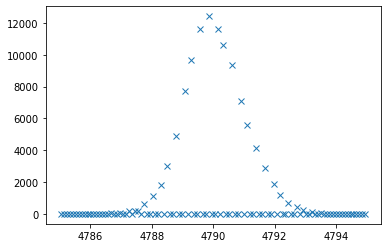

In [226]:
x,y=line_hist(tmp.delta_t*1e9,bins=np.linspace(4785,4795,105),normalized=False,linestyle='None')

In [230]:
(x*y).sum()/y.sum()

4790.051635545818

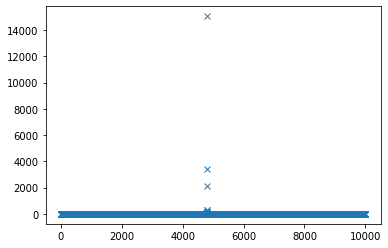

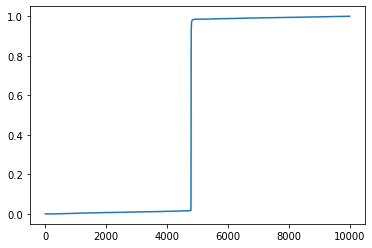

In [190]:
x,y=line_hist(tmp.delta_t*1e9,bins=np.linspace(0,10000,5000),normalized=False,linestyle='None')
ycs = np.cumsum(y)
plt.plot(x,ycs/ycs[-1])

In [222]:
(tmp['delta_t']*1e9<4795).sum()

111814

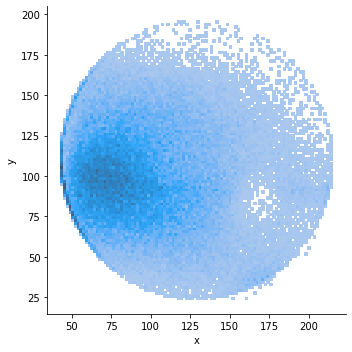

In [225]:
sns.displot(data=tmp[tmp['delta_t']*1e9<4795],x='x',y='y',bins=100)

In [97]:
tmp.loc[26_715].toa1

-26843111064.48568

In [103]:
np.longdouble?

In [ ]:
print(final_processing(df_str))

In [ ]:
pd.read_csv('preprocessed110.csv')

In [110]:
np.finfo('longdouble')

finfo(resolution=1e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)

In [111]:
np.finfo('float64')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)